# PR-ROC

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

## 1. 生成数据

In [4]:
# 生成带有噪声的二分类数据集
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.9, 0.1], random_state=42)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 2. 训练模型

In [5]:
# 使用随机森林分类器
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 3. 生成预测概率

In [6]:
# 获取正类 (1) 的预测概率
y_scores = clf.predict_proba(X_test)[:, 1]  # 取出属于类别1的概率

## 4. 计算精确率、召回率和绘制 PR 曲线

In [7]:
# 计算精确率和召回率
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# 计算平均精确率 (AP)
ap_score = average_precision_score(y_test, y_scores)

In [8]:
precision

array([0.1       , 0.12931034, 0.15384615, 0.18120805, 0.20325203,
       0.23364486, 0.25510204, 0.28915663, 0.33333333, 0.36923077,
       0.39344262, 0.37288136, 0.38596491, 0.42307692, 0.45833333,
       0.46808511, 0.47826087, 0.47727273, 0.525     , 0.53846154,
       0.56756757, 0.6       , 0.61764706, 0.63636364, 0.64516129,
       0.65517241, 0.69230769, 0.75      , 0.73913043, 0.72727273,
       0.84210526, 0.83333333, 0.82352941, 0.875     , 0.92857143,
       0.92307692, 0.91666667, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

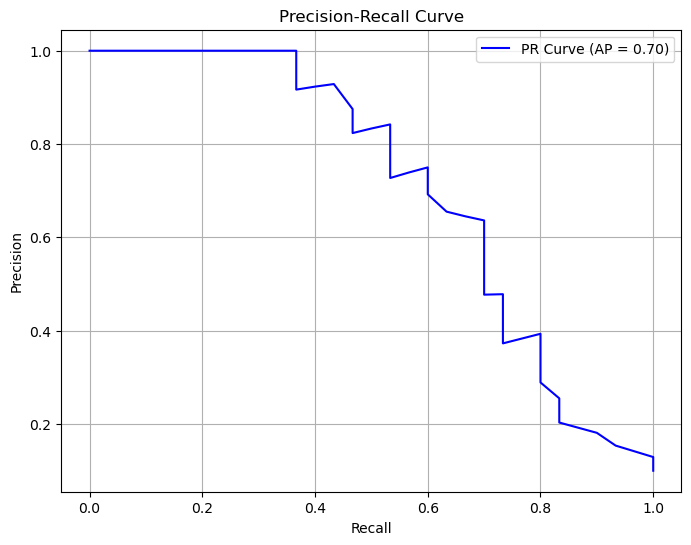

In [9]:
# 绘制 PR 曲线
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AP = {ap_score:.2f})', color='b')

# 添加图形的装饰
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

## 5. ROC 曲线 

In [10]:
# 计算 ROC 曲线的数据
fpr, tpr, thresholds_roc = roc_curve(y_test, y_scores)

# 计算 AUC
roc_auc = auc(fpr, tpr)

# 打印 AUC 值
print(f"AUC: {roc_auc:.2f}")


AUC: 0.89


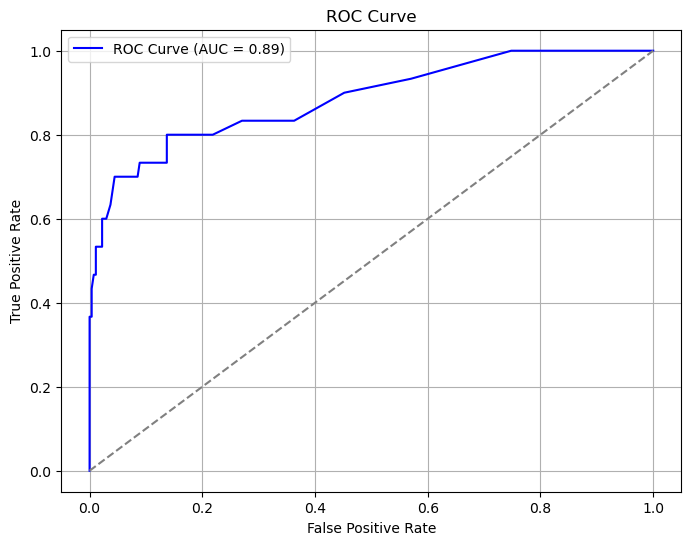

In [11]:
# 绘制 ROC 曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC Curve (AUC = {roc_auc:.2f})')

# 绘制对角线，表示随机猜测
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# 添加图形的装饰
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()